In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# load dataset
df= pd.read_csv("G:\\data science  9th sep batch\\ML capstone project data\\Telco-Customer-Churn (2).csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#feature types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#finding missing values
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# check if how many duplicate rows in dataset
df.duplicated().sum()

0

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

# LogisticRegression

In [8]:
#assigned df dataset in data_0 variable
data_0=df



In [9]:
#label categorical feature into numeric
le= LabelEncoder()
data_0.iloc[:,1]=le.fit_transform(data_0.iloc[:,1])
data_0.iloc[:,3]=le.fit_transform(data_0.iloc[:,3])
data_0.iloc[:,12]=le.fit_transform(data_0.iloc[:,12])

data_0.iloc[:,20]=le.fit_transform(data_0.iloc[:,20])

data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
data_0. describe()

,gender,SeniorCitizen,Partner,tenure,TechSupport,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,32.371149,0.797104,64.761692,0.265370
std,0.500013,0.368612,0.499748,24.559481,0.861551,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,2.000000,118.750000,1.000000


In [11]:
#extract data in x and y variable
x=data_0.iloc[:,[1,3,5,12,18]]
y=data_0.iloc[:,20]
print(x.shape)
print(y.shape)

(7043, 5)
(7043,)


In [12]:
#Splitting data of X data in x_test and x_train and y  data in y_test and y_train.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
# Creating an Object 'lr' for logisticRegression class
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [14]:
#Create a model with training dataset
lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
#predict value of y with testing dataset
y_pred=lr.predict(x_test)

In [16]:
#check predicted outcome with x testdata and actual outcome and then analyse
print("predicted value")
print(y_pred)
print("actual value")
print(y_test)

predicted value
[0 0 1 ... 0 0 0]
actual value
2200    0
4627    0
3225    0
2828    0
3768    0
       ..
2631    1
5333    1
6972    1
4598    0
3065    0
Name: Churn, Length: 1409, dtype: int32


In [17]:
# Make classification report for testing dataset
print("Classification report for testing dataset:")
print(classification_report(y_test,y_pred))

Classification report for testing dataset:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1041
           1       0.60      0.43      0.50       368

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



In [18]:
#predict value of y with training dataset
y_train_pred= lr.predict(x_train)

In [19]:
# Make classification report for training dataset
print("Classifiation report for training dataset:")
print(classification_report(y_train,y_train_pred))

Classifiation report for training dataset:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4133
           1       0.64      0.48      0.55      1501

    accuracy                           0.79      5634
   macro avg       0.73      0.69      0.71      5634
weighted avg       0.78      0.79      0.78      5634



<AxesSubplot:>

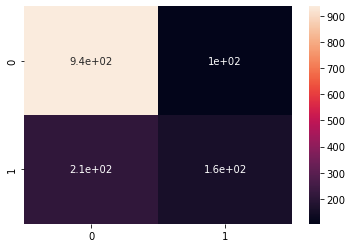

In [20]:
#evaluate  model with matrix
cf= confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)


In [21]:
# check intercept value of model  
print(lr.intercept_)

[-1.43472559]


In [22]:
#check coefficient value of variable with outcome
print(lr.coef_)

[[-0.04902768 -0.08498572 -0.05019833 -0.45473565  0.03099899]]


# Decision Tree Classification

In [23]:
#assigned df dataset in data_1 variable
data_1=df
data_1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,No,1,No,No phone service,DSL,No,...,No,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,No,34,Yes,No,DSL,Yes,...,Yes,0,No,No,One year,No,Mailed check,56.95,1889.5,0


In [24]:
#label categorical feature into numeric
le= LabelEncoder()
data_1.iloc[:,1]=le.fit_transform(data_1.iloc[:,1])
data_1.iloc[:,3]=le.fit_transform(data_1.iloc[:,3])
data_1.iloc[:,12]=le.fit_transform(data_1.iloc[:,12])

data_1.iloc[:,20]=le.fit_transform(data_1.iloc[:,20])

data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
#extract data in x and y variable
x=data_1.iloc[:,[1,3,5,12,18]]
y=data_1.iloc[:,20]
print(x.shape)
print(y.shape)

(7043, 5)
(7043,)


In [26]:
#Splitting data of X data in x_test and x_train and y  data in y_test and y_train.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 5)
(1409, 5)
(5634,)
(1409,)


In [27]:
#defining object ,train model with traing dataset and check with testing data set
DC= DecisionTreeClassifier()
DC=DC.fit(x_train,y_train)
y_pred=DC.predict(x_test)

In [28]:
#check accuracy of model of testing data set
from sklearn import metrics
print('accuracy',metrics.accuracy_score(y_test,y_pred))

accuracy 0.730305180979418


In [29]:
#evaluate model with confusion matrix
cf=confusion_matrix(y_test,y_pred)
print(cf)

[[853 208]
 [172 176]]


In [30]:
#classification report of testing dataset
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1061
           1       0.46      0.51      0.48       348

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.74      0.73      0.73      1409



# support vector classifier

In [31]:
#assigned df dataset in data_2 variable
data_2=df

In [32]:
#label categorical feature into numeric
le= LabelEncoder()
data_2.iloc[:,1]=le.fit_transform(data_2.iloc[:,1])
data_2.iloc[:,3]=le.fit_transform(data_2.iloc[:,3])
data_2.iloc[:,12]=le.fit_transform(data_2.iloc[:,12])
data_2.iloc[:,20]=le.fit_transform(data_2.iloc[:,20])

data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
#extract data in x and y variable
x=data_2.iloc[:,[1,3,5,12,18,]]
y=data_2.iloc[:,20]
print(x.shape)
print(y.shape)

(7043, 5)
(7043,)


In [34]:
#Splitting data of X data in x_test and x_train and y  data in y_test and y_train.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 5)
(1409, 5)
(5634,)
(1409,)


In [35]:
#Fitting svc classifier to the training set 
classifier=SVC(kernel='rbf',degree=2,random_state=0)
classifier.fit(x_train,y_train)

SVC(degree=2, random_state=0)

In [36]:
#Predicting the test set result
y_pred=classifier.predict(x_test)

In [37]:
#Creating the Confusion matrix
cm_0=confusion_matrix(y_test,y_pred)
print(cm_0)

[[986  75]
 [207 141]]


In [38]:
#Finding accuracy of model
from sklearn import metrics
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7998580553584103


In [39]:
#classification report of testing dataset
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1061
           1       0.65      0.41      0.50       348

    accuracy                           0.80      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.78      0.80      0.78      1409



# k neighbors classifier

In [40]:
#assigned df dataset in data_3 variable
data_3=df

In [41]:
#label categorical feature into numeric
le= LabelEncoder()
data_3.iloc[:,1]=le.fit_transform(data_3.iloc[:,1])
data_3.iloc[:,3]=le.fit_transform(data_3.iloc[:,3])
data_3.iloc[:,12]=le.fit_transform(data_3.iloc[:,12])
data_3.iloc[:,20]=le.fit_transform(data_3.iloc[:,20])

data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
#extract data in x and y variable
x=data_3.iloc[:,[1,3,5,12,18]]
y=data_3.iloc[:,20]
print(x.shape)
print(y.shape)

(7043, 5)
(7043,)


In [43]:
#Splitting data of X data in x_test and x_train and y  data in y_test and y_train.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 5)
(1409, 5)
(5634,)
(1409,)


In [44]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)  
classifier.fit(x_train, y_train)   

KNeighborsClassifier()

In [45]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [46]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_1= confusion_matrix(y_test, y_pred) 
print(cm_1)

[[908 153]
 [170 178]]


In [47]:
#Finding accuracy of model
from sklearn import metrics
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7707594038325053


In [48]:
#classification report of testing dataset
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1061
           1       0.54      0.51      0.52       348

    accuracy                           0.77      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.77      0.77      0.77      1409



# Random forest classifier

In [49]:
#assigned df dataset in data_3 variable
data_4=df

In [50]:
#label categorical feature into numeric
le= LabelEncoder()
data_4.iloc[:,1]=le.fit_transform(data_4.iloc[:,1])
data_4.iloc[:,3]=le.fit_transform(data_4.iloc[:,3])
data_4.iloc[:,12]=le.fit_transform(data_4.iloc[:,12])
data_4.iloc[:,20]=le.fit_transform(data_4.iloc[:,20])

data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
#extract data in x and y variable
x=data_4.iloc[:,[1,3,5,12,18]]
y=data_4.iloc[:,20]
print(x.shape)
print(y.shape)

(7043, 5)
(7043,)


In [52]:
#Splitting data of X data in x_test and x_train and y  data in y_test and y_train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 5)
(1409, 5)
(5634,)
(1409,)


In [53]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy",random_state=1)  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [54]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
print(y_pred)

[0 0 0 ... 0 0 1]


In [55]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_2= confusion_matrix(y_test, y_pred)  
print(cm_2)

[[922 139]
 [190 158]]


In [56]:
#Finding accuracy of model
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7665010645848119


In [57]:
#classification report of testing dataset
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1061
           1       0.53      0.45      0.49       348

    accuracy                           0.77      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



##  'support vector classifier' have highest accuracy among other model, means will give more accurate output with given inputs than others.

# GridSearchCV- LogisticRegression

In [58]:
data_5=df

In [59]:
#label categorical feature into numeric
le= LabelEncoder()
data_5.iloc[:,1]=le.fit_transform(data_5.iloc[:,1])
data_5.iloc[:,3]=le.fit_transform(data_5.iloc[:,3])
data_5.iloc[:,12]=le.fit_transform(data_5.iloc[:,12])
data_5.iloc[:,20]=le.fit_transform(data_5.iloc[:,20])

data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
#extract data in x and y variable
x=data_4.iloc[:,[1,3,5,12,18]]
y=data_4.iloc[:,20]

In [61]:
print(x)

      gender  Partner  tenure  TechSupport  MonthlyCharges
0          0        1       1            0           29.85
1          1        0      34            0           56.95
2          1        0       2            0           53.85
3          1        0      45            2           42.30
4          0        0       2            0           70.70
...      ...      ...     ...          ...             ...
7038       1        1      24            2           84.80
7039       0        1      72            0          103.20
7040       0        1      11            0           29.60
7041       1        1       4            0           74.40
7042       1        0      66            2          105.65

[7043 rows x 5 columns]


In [62]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32


In [73]:
models=[]
scores=[]
parameter=[]

In [76]:
parameters = {'penalty':['l1', 'l2']}        
c1 = LogisticRegression()
grid = GridSearchCV(c1, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c1)  
scores.append(grid.best_score_) 
parameter.append(grid.best_params_)

{'penalty': 'l2'}
LogisticRegression()
0.7863100419084461


C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(


# GridSearchCV- DecisionTreeClassifier

In [77]:
parameters = {'criterion':['gini', 'entropy'],
              'splitter':['best', 'random']
              }        
c2 = DecisionTreeClassifier()
grid = GridSearchCV(c2, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c2)  
scores.append(grid.best_score_)  
parameter.append(grid.best_params_)

{'criterion': 'entropy', 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', splitter='random')
0.7316487346872986


# GridSearchCV- Support Vector Classifier (SVC)

In [84]:
parameters = {'C': [0.01, 0.05],
              'degree': [2, 3],
              'gamma':[0.001, 0.01],
              'kernel': ['rbf']
              }        
c3 = SVC()
grid = GridSearchCV(c3, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
     

models.append(c3)
scores.append(grid.best_score_)
parameter.append(grid.best_params_)

{'C': 0.05, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.05, degree=2, gamma=0.01)
0.7904287556415216


# GridSearchCV-KNeighborsClassifier(KNN)

In [83]:
parameters = {'n_neighbors': range(30),
              'metric':['manhattan','euclidean']}        
c4 = KNeighborsClassifier()  
grid = GridSearchCV(c4, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

models.append(c4)     
scores.append(grid.best_score_)
parameter.append(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 22}
KNeighborsClassifier(metric='manhattan', n_neighbors=22)
0.7897165135396518


C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 569, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbor

# GridSearchCV- RandomForestClassifier

In [82]:
parameters = {'n_estimators':range(20),
              'criterion':['gini','entropy']}        
c5 = RandomForestClassifier()  
grid = GridSearchCV(c5, parameters, cv=10)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


models.append(c5)      
scores.append(grid.best_score_) 
parameter.append(grid.best_params_)

{'criterion': 'gini', 'n_estimators': 8}
RandomForestClassifier(n_estimators=8)
0.7635968729851709


C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\Mukesh\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be greater t

In [93]:
result=pd.DataFrame({"Models":models,"Scores":scores})

In [90]:
print(result)

                     Models     Score
0  DecisionTreeClassifier()  0.727668
1      LogisticRegression()  0.786310
2  DecisionTreeClassifier()  0.731649
3                     SVC()  0.790429
4    KNeighborsClassifier()  0.789717
5  RandomForestClassifier()  0.765162
6  RandomForestClassifier()  0.763597
7    KNeighborsClassifier()  0.789717
8                     SVC()  0.790429


# From part 1 and 2 we can say" support vector model "is having highest score as well as accuracy so we can use this model to predict wheather the customer will churn or will retain with company by giving inputs which used at time of model building.